# Two Way ANOVA 

## #01. 작업준비

### 파이썬에서 ANOVA를 사용하기 위한 패키지

> statsmodel 만 제공

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sb
from matplotlib import pyplot as plt
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import all_test


## #01. 예제 (1)
### 1. 데이터 가져오기
태아의 머리 둘레 측정 데이터.

3명의 태아를 대상으로 4명의 관측자가 측정.

이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사

In [2]:
df = pd.read_excel("https://data.hossam.kr/E02/alrtman.xlsx")
df

,태아번호,측정자번호,머리둘레
0,1,1,14.3
1,1,1,14.0
2,1,1,14.8
3,1,2,13.6
4,1,2,13.6
5,1,2,13.8
6,1,3,13.9
7,1,3,13.7
8,1,3,13.8
9,1,4,13.8


### 2. 탐색적 데이터 분석

측정자에 따른 태아의 머리둘레 확인

그림을 보면 태아 3명의 머리둘레는 차이가 있어보이지만 이것이 관측자와 상호작용이 있는 것인지 분석을 통해 알아보고자 함

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

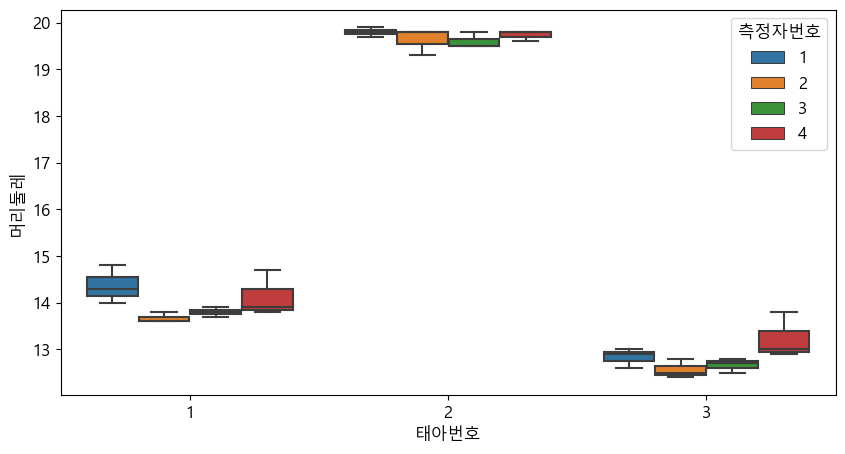

In [4]:
plt.figure()
sb.boxplot(data=df,x='태아번호',y='머리둘레',hue='측정자번호')
plt.show()
plt.close()

### 3. 추론적 데이터 분석

#### 가설설정
귀무가설 : 태아의 머리 둘레차이는 측정자와 상관없이 동일

대립가설 : 태아의 머리 둘레 차이는 측정자에 영향을 받는다

#### 정규성, 독립성, 등분산성 검정
> 충족한다고 가정

In [5]:
all_test(df['태아번호'],df['측정자번호'],df['머리둘레'])

Statistic       p-value  Result
Condition Test      Field                                                 
정규성       Shapiro   태아번호                    0.794544  1.271364e-05   False
                    측정자번호                   0.857769  2.887842e-04   False
                    머리둘레                    0.742801  1.429796e-06   False
          normal    태아번호                   23.481208  7.963801e-06   False
                    측정자번호                  14.053919  8.876264e-04   False
                    머리둘레                   24.573578  4.612277e-06   False
          k-s_2samp 태아번호 vs 측정자번호           0.250000  2.122867e-01    True
                    측정자번호 vs 머리둘레           1.000000  4.519646e-21   False
                    머리둘레 vs 태아번호            1.000000  4.519646e-21   False
등분산성      Bartlett  태아번호 vs 측정자번호 vs 머리둘레  64.853335  8.265656e-15   False
          Fligner   태아번호 vs 측정자번호 vs 머리둘레  12.782139  1.676462e-03   False
          Levene    태아번호 vs 측정자번호 vs 머리둘레  13.063350  8.583289e-06   False
독립성       Chi2      태아번호 vs 측정자번호 vs 머리둘레  33.814972  9.999218e-01    True

#### 이원분산분석 시행

> scipy.stats 패키지는 이원분산분석 지원 x 

고려해야하는 경우의 수 

>> 태아에 따라 머리둘레가 다른지

>> 측장자에 따라 머리둘레가 다른지

>> 태아와 측정자에 따라 머리둘레가 다른지

#### 세가지 경우에 따라 머리둘레의 평균에 유의미한 차이가 있는지 분석

In [6]:
formula = '머리둘레 ~ C(태아번호)+C(측정자번호)+C(태아번호):C(측정자번호)'

lm = ols(formula,df).fit()
anova = anova_lm(lm)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(태아번호),2.0,324.008889,162.004444,2113.101449,1.051039e-27
C(측정자번호),3.0,1.198611,0.399537,5.211353,6.497055e-03
C(태아번호):C(측정자번호),6.0,0.562222,0.093704,1.222222,3.295509e-01
Residual,24.0,1.840000,0.076667,NaN,NaN


## 예제(2)

한 식물학자는 식물의 성장이 햇빛 노출과 관수 빈도에 의해 영향을 받는지 여부를 알고 싶어한다.

실험은 30개의 씨앗을 심고 햇빛 노출과 물 주기를 다른 조건으로 하여 두 달 동안 자라게 한 후 각 식물의 높이를 인치 단위로 기록하였다.

#### 데이터 가져오기 

|필드|설명|값|
|---|---|---|
|water|	각 실물에 물을 주는 빈도	|매일:daily, 매주: weekly|
|sun	|각 식물이 받은 햇빛 노출량|	낮음:low, 중간:med, 높음:high|
|height|	2개월 후 각 식물의 높이	|인치|

In [7]:
df = pd.read_excel("https://data.hossam.kr/E02/plant_growth.xlsx")
df

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,med,5
6,daily,med,5
7,daily,med,6
8,daily,med,4
9,daily,med,5


### 2. 탐색적 데이터 분석
#### 요인에 따른 식물의 높이 확인



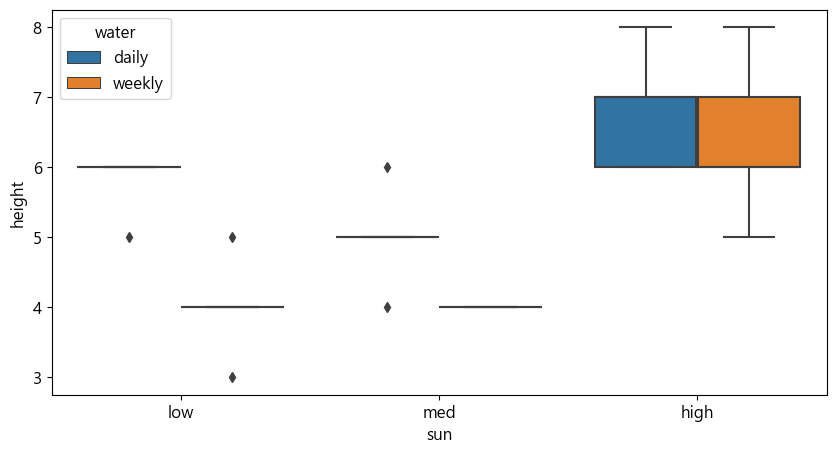

In [8]:
plt.figure()
sb.boxplot(data= df,x='sun',y='height',hue = 'water')
plt.show()
plt.close()



#### 데이터 전처리
##### 라벨링 ㄱㄱ 

In [9]:
df2 = df.copy()

df2['sun']=df['sun'].map({'low':0,'med':1,'high':2})
df2['water']=df['water'].map({'daily':0,'weekly':1})

In [12]:
all_test(df2['sun'],df2['water'],df2['height'])

Statistic       p-value  Result
Condition Test      Field                                                   
정규성       Shapiro   sun                       0.795503  5.434527e-05   False
                    water                     0.638237  2.211095e-07   False
                    height                    0.917132  2.261243e-02   False
          normal    sun                      17.211505  1.830498e-04   False
                    water                   279.252501  2.296624e-61   False
                    height                    1.140421  5.654064e-01    True
          k-s_2samp sun vs water              0.333333  7.088799e-02    True
                    water vs height           1.000000  1.691123e-17   False
                    height vs sun             1.000000  1.691123e-17   False
등분산성      Bartlett  sun vs water vs height   23.058466  9.838245e-06   False
          Fligner   sun vs water vs height   22.593788  1.241141e-05   False
          Levene    sun vs water vs height    9.023098  2.748167e-04   False
독립성       Chi2      sun vs water vs height   32.576490  9.971957e-01    True

#### 이원분산분석 수행

In [13]:
model = ols('height ~ C(sun)+ C(water)+C(sun):C(water)',data=df).fit()
anova_lm(model)


,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,24.866667,12.433333,23.3125,0.000002
C(water),1.0,8.533333,8.533333,16.0000,0.000527
C(sun):C(water),2.0,2.466667,1.233333,2.3125,0.120667
Residual,24.0,12.800000,0.533333,NaN,NaN
